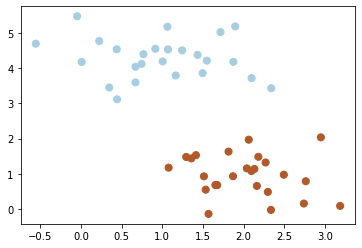

In [1]:
# HIDE CODE
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);

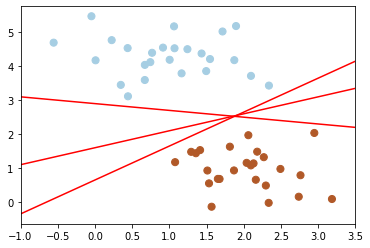

In [2]:
# HIDE CODE
import numpy as np

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-r')
plt.xlim(-1, 3.5);

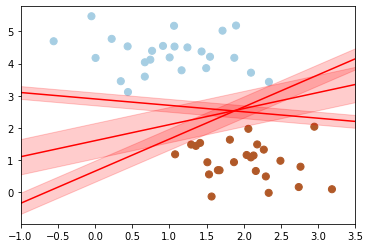

In [3]:
# HIDE CODE
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-r')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='r', alpha=0.2)

plt.xlim(-1, 3.5);

In [4]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [5]:
# HIDE CODE
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

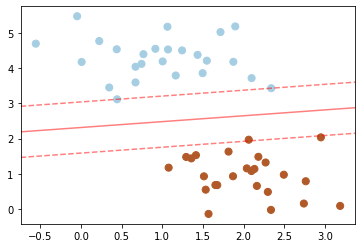

In [6]:
# HIDE CODE
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);
plot_svc_decision_function(clf);

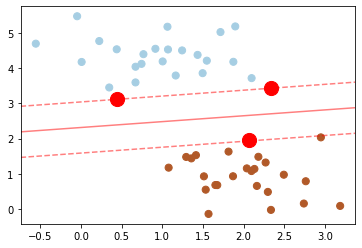

In [7]:
# HIDE CODE
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='red');

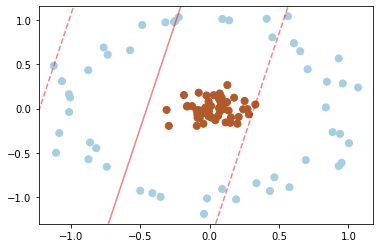

In [8]:
# HIDE CODE
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf);

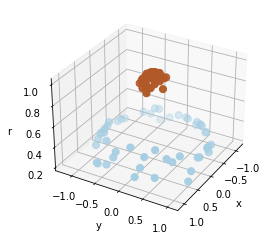

In [9]:
# HIDE CODE
from mpl_toolkits import mplot3d
# radial basis
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
# plot
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.Paired)
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

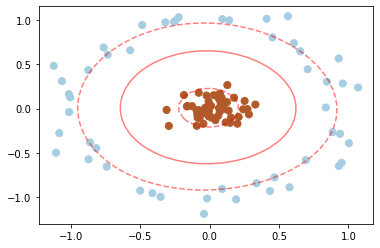

In [10]:
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none');